# Project: Wrangling and Analyze Data

In [546]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json 

## Data Gathering

1. I Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [547]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(1) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. I will use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [548]:
import requests 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image_predictions  = pd.read_csv('image_predictions.tsv', sep='\t')

In [549]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. I will use the Requests library to download additional data and store them in Json (tweet_json.txt)

In [ ]:
# I went through the twitter api process , but eventually I got to a point where I used the request function to access the data from Udacity's servers 

#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [550]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet_json.txt', mode = 'wb') as file:
    file.write(response.content)


In [551]:
listt = [] 
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        listt.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
df_Json_tweets = pd.DataFrame(listt, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data
In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We will go through **both** visual and programmatic assessement to assess the data.




### Archive Data

In [552]:
df_archive.head()   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


A visual assessment shows that there is a poor one-hot-encoding technique used in order to clarify dog types ,it should have been only one column instead of four for tidiness purposes . 

In this dataset we are only going to focus on original tweets and no retweets or replys so columns like "in_reply_to_status_id" or "retweeted_status_id" will be needed to filter some observations .


In [553]:
df_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


Tweet_id must be string and not int 

'retweeted_status_timestamp' should be dropped since it tells us which time the tweet got retweeted , since we are only working on original tweets and not retweets , this column will be useless  

In [554]:
df_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


From the Describe function we can see that there is quite a number of replys and retweets 

Intersting max values for rating numerator and denominator , those are very extreme cases i suppose 

In [555]:
x , y = len( df_archive[ df_archive.in_reply_to_status_id.isna()==False]) , len( df_archive[ df_archive.retweeted_status_id.isna()==False])

print('number of replys : ', x  ) 
print('number of retweets : ', y )  
print('useless tweets : ' , ((x+y)/ len(df_archive))*100 , '%'   )

number of replys :  78
number of retweets :  181
useless tweets :  10.99320882852292 %


Looks like replys and retweets represent 11% of our data , these tweets will be deleted 

In [556]:
df_archive_original =  df_archive[ df_archive.in_reply_to_status_id.isna() & df_archive.retweeted_status_id.isna()  ]    
print('Total sample size: ' ,  len(df_archive) ) 
print('number of original tweets : ' ,  len(df_archive_original) )


Total sample size:  2356
number of original tweets :  2097


Our data now only contains original tweets 

In [557]:
df_archive_original.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Most of these tweets are posted from Iphone 

These sources come with HTML syntax so it needs to be cleaned

In [558]:
df_archive_original.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

Looks like we have 603 samples with no names  

There is a value in the name column equals 'a' , this is not a real name to use , usually names start with an uppercase so let's see variables starting with lowercase 

In [559]:
df_archive_original[df_archive_original.name.str[0].str.islower()==True].name.value_counts()          

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

Looks like we have a lot of typos too 

In [560]:
df_archive_original.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

Most of these denominators are outliers and need to be fixed 

In [561]:
df_archive_original.rating_numerator.value_counts() 

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

Same thing for rating numerators , there are values that do not make sense

Let's see if there is a pattern between these variables

In [562]:
df_archive_original[(df_archive_original.rating_denominator>10) &  (df_archive_original.rating_numerator>10 ) ][['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator
433,84,70
902,165,150
1120,204,170
1202,50,50
1228,99,90
1254,80,80
1274,45,50
1351,60,50
1433,44,40
1635,121,110


Those variables look exagerrated , It seems like the person writing the tweets was giving rates out of emotions or excitement

In [563]:
df_ratio = df_archive_original.copy()   
df_ratio['ratio'] = df_ratio.rating_numerator / df_ratio.rating_denominator *10
df_ratio[(df_ratio.rating_denominator>10) & (df_ratio.rating_numerator>10 ) ][['tweet_id','rating_numerator' , 'rating_denominator','ratio']]

,tweet_id,rating_numerator,rating_denominator,ratio
433,820690176645140481,84,70,12.0
902,758467244762497024,165,150,11.0
1120,731156023742988288,204,170,12.0
1202,716439118184652801,50,50,10.0
1228,713900603437621249,99,90,11.0
1254,710658690886586372,80,80,10.0
1274,709198395643068416,45,50,9.0
1351,704054845121142784,60,50,12.0
1433,697463031882764288,44,40,11.0
1635,684222868335505415,121,110,11.0


It would be best to replace those rating numerator outliers with their ratios multiplied by 10 , and then replace the denominator with 10 that would be more logical 

In [564]:
dog_stages_columns = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages_columns : 
    print( 'Type : ' , stage ,' , ', 'Count : ' ,  df_archive_original[stage].value_counts()[stage]  )


Type :  doggo  ,  Count :  83
Type :  floofer  ,  Count :  10
Type :  pupper  ,  Count :  230
Type :  puppo  ,  Count :  24


It seems like 'pupper' is the most frequent stage in our data 

### Image predictions

In [565]:
df_image_predictions.head(10) 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


By visually analysing the data I think everything looks good , except I think we are only keeping the best prediction 

Judging by values in columns 'p1_dog' , 'p2_dog' , 'p3_dog' and by the names of the predicted image we notice that some images are not images of dogs so we must delete them

In [566]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All data types are good except for tweet_id 

In [567]:
df_image_predictions.describe(include='all') 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


We notice that there are 2009 unique image URLs , meaning there are some duplicates 

378 p1 dogs , 405 for p2 and 408 for p3 , seems like there are some frequent dogs

No missing values

In [568]:
df_image_predictions.jpg_url.duplicated().sum() 

66

66 repeated images

### Json Data

In [569]:
df_Json_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Visually this data looks good 

In [570]:
df_Json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


tweet_id to string 

In [571]:
df_Json_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Min and Max values seem interesting , maybe those zero retweets and favorites are related to retweets and not original tweets ? We'll see

In [572]:
df_Json_tweets.tweet_id.duplicated().sum()

0

Good we have only unique ones 

### Quality issues


##### Archive : 

- Data Contains retweets and replys 

- Tweet_id is in int and not string type  

- Source column contains HTML syntax  

- Name column contains false names and names in lowercase 

- Rating numerators and denominators have some outliers

- Timestamp data is in object and not Datetime type 

##### Image Predictions : 

- There are duplicate images

- tweet_ID is not in string type 

##### Json tweets :

- tweet_ID is not in string type 





### Tidiness issues
- Dog stage information is given in 4 columns

- Useless IDs and time columns related to retweets and replys  

- Useless second and third best model dog predictions

- All of these tables should be joined on 'tweet_id' column in order to group all the data in one table so it's easier to analyse 

## Cleaning Data
In this section, I will clean **all** of the issues I documented. 


In [573]:
# Making copies of my tables 

df_archive_copy = df_archive.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_Json_tweets_copy = df_Json_tweets.copy() 


## Quality issues


### Archive data

### Issue #1: Data must only contain original tweets

#### Define:

We must remove all rows containing values in 'in_reply_to_status_id' and 'retweet_status_id' columns

#### Code

In [574]:
df_archive_copy =  df_archive_copy[ df_archive_copy.in_reply_to_status_id.isna() & df_archive_copy.retweeted_status_id.isna()  ]    

#### Test

In [575]:
print('Total sample size: ' ,  len(df_archive) )
print('number of original tweets : ' ,  len(df_archive_copy) )

Total sample size:  2356
number of original tweets :  2097


### Issue #2: Convert tweet_id to string

#### Define
tweet_id column must be string , not integer 


#### Code

In [576]:
df_archive_copy.tweet_id =  df_archive_copy.tweet_id.astype(str)

#### Test

In [577]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #3: Clean the source column from HTML code

#### Define
Our source column includes HTML syntax which is useless


#### Code

In [578]:
df_archive_copy['source'] = df_archive_copy['source'].str.replace(r'<[^<>]*>', '', regex=True)

#### Test

In [579]:
df_archive_copy.source.value_counts() 

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4: Filter wrong names

#### Define
There are values in the name column that have no meaning and are in lowercase


#### Code

In [580]:
df_archive_copy =  df_archive_copy[df_archive_copy.name.str[0].str.islower()==False]


#### Test

In [581]:
print(df_archive_copy.shape)
df_archive_copy[df_archive_copy.name.str[0].str.islower()==True].name.value_counts() 

(1993, 17)


Series([], Name: name, dtype: int64)

### Issue #5: Fixing rating nominator and denomiator values

#### Define
Rating numerators must be adjusted to their ratios with their correspondant denominator and multiplied by 10 , then we shall change the values of their denominator 


#### Code

In [582]:
df_archive_copy['rating_numerator'] = np.where((df_archive_copy['rating_numerator']>=10) & (df_archive_copy["rating_denominator"]>10) , df_archive_copy.rating_numerator / df_archive_copy.rating_denominator *10 , df_archive_copy.rating_numerator )
df_archive_copy['rating_denominator'] = np.where( df_archive_copy["rating_denominator"]>10 ,10 , df_archive_copy.rating_denominator )

#### Test

In [583]:
#df_archive_copy[df_archive_copy.tweet_id=='709198395643068416'][['rating_numerator','rating_denominator']]
#df_archive_copy[df_archive_copy.tweet_id=='697463031882764288'][['rating_numerator','rating_denominator']]
df_archive_copy[df_archive_copy.tweet_id=='758467244762497024'][['rating_numerator','rating_denominator']]
#df_archive_copy[df_archive_copy.tweet_id=='820690176645140481'][['rating_numerator','rating_denominator']]



,rating_numerator,rating_denominator
902,11.0,10


We tested our changes with a tweet that had previous outlier values in both denominator and numerator , but now it seems fine 

### Issue #6: Fixing TimeStamp to DateTime type 

#### Define
All dates should be in datetime type , so here we are going to get this column converted from object to datetime


#### Code

In [584]:
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

#### Test

In [585]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1993 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1993 non-null   datetime64[ns, UTC]
 4   source                      1993 non-null   object             
 5   text                        1993 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1990 non-null   object             
 10  rating_numerator            1993 non-null   float64         

### Image predictions data 

### Issue #1: Some images are duplicated

#### Define
Some url images are duplicated and need to be removed 


#### Code

In [586]:
df_image_predictions_copy.drop_duplicates(subset='jpg_url', keep="last",inplace=True )

#### Test

In [587]:
df_image_predictions_copy.jpg_url.duplicated().sum() 

0

### Issue #2: tweet_id should be string 

#### Define
Tweet_id shall be converted to string 


#### Code

In [588]:
df_image_predictions_copy.tweet_id =  df_image_predictions_copy.tweet_id.astype(str)

#### Test

In [589]:
df_image_predictions_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Json data

### Issue #1: tweet_id should be string 

#### Define
Tweet_id shall be converted to string 


#### Code

In [590]:
df_Json_tweets_copy.tweet_id =  df_Json_tweets_copy.tweet_id.astype(str) 

#### Test

In [591]:
df_Json_tweets_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tidiness issues


### Issue #1: Dog stage should be one column only

#### Define
In order to keep our data clean we should only store this information in one column if we could , this will make our analysis easier 


#### Code 1 

In [592]:
df_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None


In [593]:
df_archive_copy.doggo.replace('None', '' , inplace=True)
df_archive_copy.floofer.replace('None', '' , inplace=True)
df_archive_copy.pupper.replace('None', '' , inplace=True)
df_archive_copy.puppo.replace('None', '' , inplace=True)

df_archive_copy['stage'] = df_archive_copy['doggo'] + df_archive_copy['floofer'] +  df_archive_copy['pupper'] + df_archive_copy['puppo']
df_archive_copy.drop(columns=['doggo','floofer','pupper' ,'puppo'] , inplace=True )

#### Test 1 

In [594]:
df_archive_copy.stage.value_counts()

                1671
pupper           210
doggo             70
puppo             23
floofer            9
doggopupper        8
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

Seems like there were some errors when making this data , I am no dog expert but from my understanding of the problem a dog cannot be in two stages at the same time . It doesn't seem logical so I think we should drop those observations . 

#### Code 2 

In [595]:
df_archive_copy=df_archive_copy[ (df_archive_copy.stage.str.contains('doggopupper') == False) & (df_archive_copy.stage.str.contains('doggopuppo') == False) & (df_archive_copy.stage.str.contains('doggofloofer') == False) ]

#### Test 2

In [596]:
df_archive_copy.stage.value_counts() 

           1671
pupper      210
doggo        70
puppo        23
floofer       9
Name: stage, dtype: int64

### Issue #2: Drop useless ID and time columns

#### Define
ID columns like 'in_reply_to_status_id' , 'in_reply_to_user_id' indicate if our tweet is a reply or not , if yes it gives us the ID of the tweet replyed to and its user 

Same with 'retweeted_status_id' , 'retweeted_status_user_id' ,'retweeted_status_timestamp' they tell us the ID of the tweet retweeted , the user doing the retweet and the time of the retweet


#### Code

In [597]:
df_archive_copy.drop(columns=['retweeted_status_id' ,'retweeted_status_user_id' , 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id' ],inplace=True )

#### Test

In [598]:
df_archive_copy.head(1)  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,


### Issue #3: Only keep the best prediction of our model 

#### Define
Keeping the second and third model prediction is useless , we are only interested in our model's best prediction 


#### Code

In [599]:
df_image_predictions_copy.columns 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [600]:
def set_prediction_breed(row):
    if row['p1_conf']==row['confidance'] : 
        return row['p1']
    elif row['p2_conf']==row['confidance']:
        return row['p2']
    else : 
        return row['p3']
    

def set_prediction_state(row):
    if row['p1_conf']==row['confidance'] : 
        return row['p1_dog']
    elif row['p2_conf']==row['confidance']:
        return row['p2_dog']
    else : 
        return row['p3_dog']

df_image_predictions_copy['confidance'] = df_image_predictions_copy[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)
df_image_predictions_copy = df_image_predictions_copy.assign(dog_breed=df_image_predictions_copy.apply(set_prediction_breed, axis=1))
df_image_predictions_copy = df_image_predictions_copy.assign(Is_dog=df_image_predictions_copy.apply(set_prediction_state, axis=1))
df_image_predictions_copy=df_image_predictions_copy[df_image_predictions_copy.Is_dog==True]  # so that we only pick dog images 
df_image_predictions_copy.drop(columns=['Is_dog'] , inplace=True) # since all the values will be equal to true , we will drop this column 
df_image_predictions_copy.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'] , inplace=True )


#### Test

In [601]:
df_image_predictions_copy.head()

,tweet_id,jpg_url,img_num,confidance,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,miniature_pinscher


### Issue #4: All data should be merged into one table 

#### Define
In order to make our analysis simpler , we should group our data in one table . We shall join our tables on "tweet_id" column 


#### Code

In [602]:
df_archive_copy = df_archive_copy.merge(df_image_predictions_copy, how='left', left_on='tweet_id', right_on='tweet_id')

In [603]:
df_archive_copy = df_archive_copy.merge(df_Json_tweets_copy, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test

In [604]:
df_archive_copy.shape 

(1983, 15)

In [605]:
df_archive_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,confidance,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,Chihuahua,4328,25461


## Storing Data
We will save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [606]:
df_archive_copy.to_csv('twitter_archive_master.csv', index=False) 


Looks like we are good to go !

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data.

#### 1: Which dog breeds our model has predicted best ? 

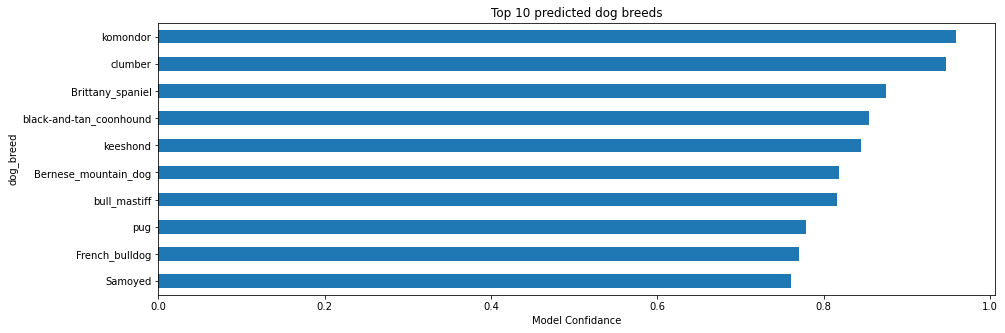

In [607]:
plt.figure(figsize=(15,5))  
ax = df_archive_copy.groupby('dog_breed').mean()['confidance'].sort_values(ascending=False).head(10)[10::-1].plot(kind='barh') 
ax.set(xlabel='Model Confidance',  title='Top 10 predicted dog breeds');

Here are the Top 10 dog breeds with the highest confidance of our model . On average our model did very well predicting those two specific dog breeds 'Komondor' and 'Clumber' . 

#### 2: Which dog breeds are the most popular ? 

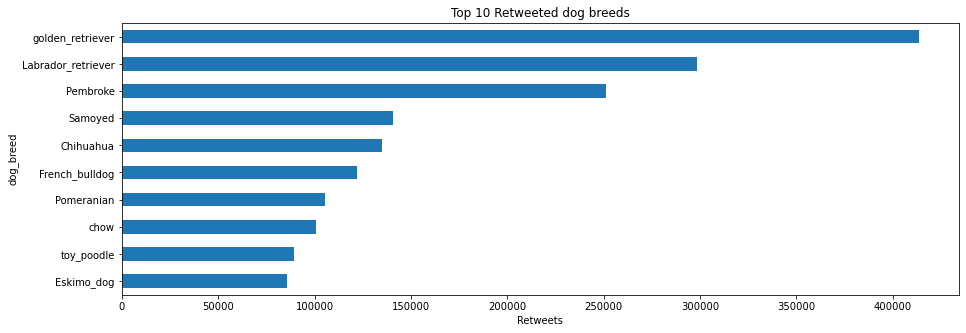

In [608]:
plt.figure(figsize=(15,5))     
ax = df_archive_copy.groupby('dog_breed').sum()['retweet_count'].sort_values(ascending=False).head(10)[10::-1].plot(kind='barh') 
ax.set(xlabel='Retweets', title='Top 10 Retweeted dog breeds');

Seems like people like sharing posts about Golden retrievers and Labradors the most

#### 3: Which dog breeds have the highest ratings ? 

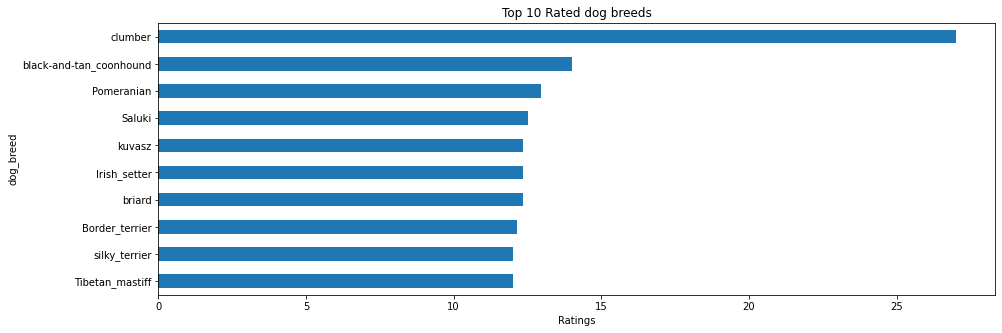

In [609]:
plt.figure(figsize=(15,5))      
ax = df_archive_copy.groupby('dog_breed').mean()['rating_numerator'].sort_values(ascending=False).head(10)[10::-1].plot(kind='barh' )
ax.set(xlabel='Ratings', title='Top 10 Rated dog breeds');

On average Clumber dogs have the highest ratings 

#### 4: Which dog stage is more favorable on average ? 

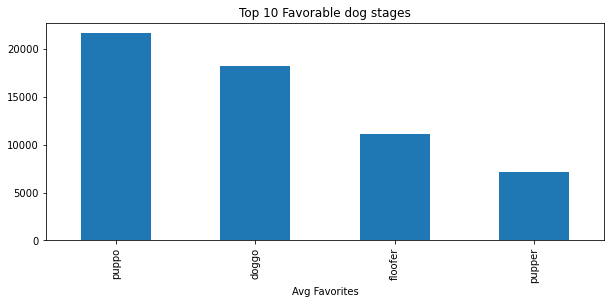

In [610]:
plt.figure(figsize=(10,4))  
stages = ['floofer', 'doggo', 'pupper', 'puppo']   
ax = df_archive_copy.query('stage in @stages').groupby('stage').mean()['favorite_count'].sort_values(ascending=False).plot(kind='bar' )
ax.set(xlabel='Avg Favorites', title='Top 10 Favorable dog stages');

Seems like on average the audience really likes to see puppies content 